
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

* Adriano Antonello
* Gabriel Delgado
* Pablo Casas
* Augusto Lobelos

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import seaborn as sns
import scipy.stats

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [6]:
alpha = 0.05

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [7]:
is_man = df.profile_gender == 'Hombre'
groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

In [8]:
n_a = len(groupA)
n_b = len(groupB)
print('Cantidad Grupo A: '+ str(n_a))
print('Cantidad Grupo B: '+ str(n_b))

Cantidad Grupo A: 4815
Cantidad Grupo B: 891


In [9]:
est_puntual = groupA.mean() - groupB.mean()
print('Estimador Puntual = ' + str(round(est_puntual, 1)))

Estimador Puntual = 23262.4


In [10]:
#Distribucion de VA
mu_a = groupA.mean()
mu_b = groupB.mean()
sigma2_a = groupA.var()
sigma2_b = groupB.var()

In [11]:
mu = mu_a - mu_b
sigma2 = (sigma2_a / n_a) + (sigma2_b / n_b)
sigma = numpy.sqrt(sigma2)
intervalo = scipy.stats.norm.interval(1 - alpha, loc=mu, scale=sigma)
i, s = intervalo
print('Esperanza del Estimador  = ' +str(mu))
print('Varianza del Estimador   = ' +str(sigma2))
print('Desviación del Estimador = ' +str(sigma))
print('------------------------------------')
print('Intervalo de Confianza   = ' +str(1 - alpha))
print('Intervalo                = ' +str(intervalo))
print('Longitud del IC =        = ' +str(s - i))

Esperanza del Estimador  = 23262.37339991823
Varianza del Estimador   = 5754595.53308754
Desviación del Estimador = 2398.8738051609844
------------------------------------
Intervalo de Confianza   = 0.95
Intervalo                = (18560.667138346143, 27964.079661490316)
Longitud del IC =        = 9403.412523144172


El **intervalo de confianza** contiene al parámetro que queremos estimar ($\mu_{a} - \mu_{b}$) con cierta tendencia ($1 - \alpha$), basad en una muestra aleatoria de la población.
El resultado obtenido da un primer indicio que tal vez la **hipótesis nula** $H_{0}$ ( de que ambos grupos cobran en promedio el mismo salario) no sea real.
Si las variables aleatorias $X_{a}$ y $X_{b}$ tuvieran la misma esperanza, $\mu_{a} = \mu_{b}$, el intervalo de confianza debería incluir al 0.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

### Respuestas

#### 2.1 Formalización

**Hipótesis Nula**

$H_0:$ La distribución de los salarios es **idéntica** entre ambos grupos, $\mu_{a} - \mu_{b} = 0$.

**Hipótesis Alternativa**

$H_1:$ La distribución de los salarios es **distinta** entre ambos grupos, $\mu_{a} - \mu_{b} \neq 0$.

**Nivel de Significancia**

$\alpha = 0.05$

**Estadistico**
Se deberia hacer el *Test de Welch* porque no se conocen las desviaciones ($\sigma_{a}$ y $\sigma_{b}$) de las poblaciones, los tamaños de las muestras ($n_{a}$ y $n_{b}$) son distintos, y queremos verificar si las medias ($\mu_{a}$ y $\mu_{b}$) son equivalentes.

$
\Large
t_{Welch} = \frac{ \overline{X_{a}} - \overline{X_{b}}} {s_{Welch}} \sim t_{DoF}
$

$
\Large
s_{Welch} = \sqrt{ \frac{s^{2}_{a}} {n_{a}} +  \frac{s^{2}_{b}} {n_{b}}}
$

$
\Large
{DoF} = \frac{(\frac{s^{2}_{a}}{n_{a}} + \frac{s^{2}_{b}}{n_{b}})^{2}} {\frac{(\frac{s^{2}_{a}}{n_{a}})^{2}}{n_{a} - 1} + \frac{(\frac{s^{2}_{b}}{n_{b}})^{2}}{n_{b} - 1}}
$

#### 2.2 P-Valor

In [12]:
t_welch = scipy.stats.ttest_ind(groupA, groupB, equal_var=False)
print('P-valor = ' +str(t_welch.pvalue))

P-valor = 8.605197322133209e-22


Agregar observaciones 

In [13]:
from statsmodels.stats.power import tt_ind_solve_power

In [14]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [15]:
potencia = [0.85, 0.90, 0.95]
for power in potencia:
    resultado = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
    print('Potencia = '+str(power) + ' =====> Muestras = ' +str(round(resultado, 1)))

Potencia = 0.85 =====> Muestras = 341.0
Potencia = 0.9 =====> Muestras = 398.8
Potencia = 0.95 =====> Muestras = 492.8


In [16]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

492.8117730248978

Se observa un p-valor extremadamente bajo, por tanto se rechaza la hipotesis nula ($H_{0}$). Es decir se rechaza la suposición que las medias de los salarios de hombres, y otros géneros, sean idénticas. Ademas al utilizar el Test de Welch logramos ignorar el problema que podría provocar el tener muestras de diferentes tamaños. 

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


In [17]:
df['range_age'] = pd.cut(df.profile_age, bins=list(range(20,60,10)))
range_age=df.groupby(['profile_gender','range_age']).agg({'salary_monthly_NETO':'mean'}).reset_index()
range_age

,profile_gender,range_age,salary_monthly_NETO
0,Hombre,"(20, 30]",79777.779398
1,Hombre,"(30, 40]",115340.228365
2,Hombre,"(40, 50]",112456.199558
3,Mujer,"(20, 30]",64832.359424
4,Mujer,"(30, 40]",82720.345358
5,Mujer,"(40, 50]",81643.266508
6,Otros,"(20, 30]",73100.000000
7,Otros,"(30, 40]",137907.200000
8,Otros,"(40, 50]",55.000000


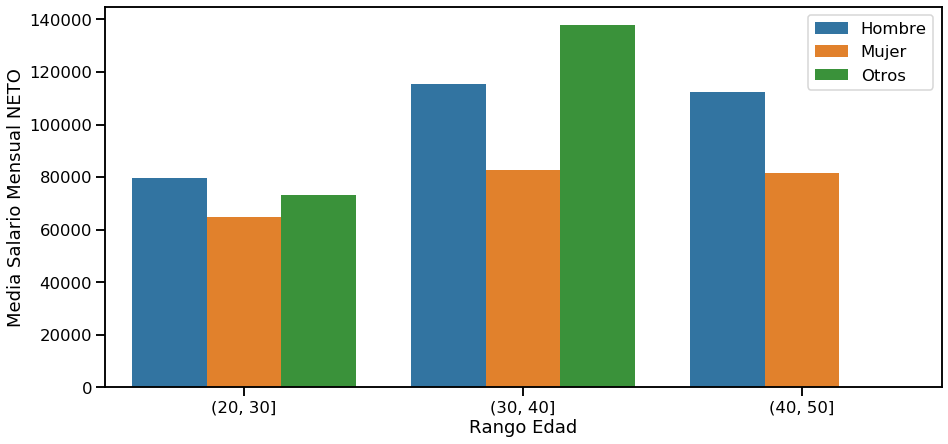

In [18]:
plt.figure(figsize=(15,7))
ax=sns.barplot(data=range_age,x='range_age',y='salary_monthly_NETO',hue='profile_gender')
#plt.title('Salario de hombres y mujeres por edad')
plt.ylabel("Media Salario Mensual NETO")
plt.xlabel("Rango Edad")
plt.legend(loc='best')

plt.show()